   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

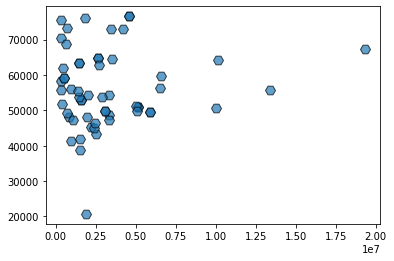

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

us_census = glob.glob('states*.csv')

# first create an empty df list
# iterate through the filenames of the globbed df (the data equals pd.read the filename) then append the data into the empty data frame
# finally concatenate (pd.concat) the original df with the iterated df

df_list = []
for i in us_census:
  data = pd.read_csv(i)
  df_list.append(data)

us_census = pd.concat(df_list)
print(us_census.head())
#print(us_census.nunique())

#print(us_census.columns)
#print(us_census.dtypes)

# melt can be used to only display neccessary columns
# need to remove % from race columns and convert to numeric
  # df.col = df.col.replace('[\%,]', regex=True)
# need to remove $ from income
  #df.col = df.col.replace('[\$,]', regex=True)
# need to separate GenderPop by character (var = df.column.str.split('_')), then remove the M/F letters at the end (split by index by using df.column.str[:-1]) and store them in 2 different columns (df.new_col_name = df.var.str.get(0)) [popM, popF]
# convert to numeric
  # df.col = pd.to_numeric(df.col)

us_census.Income = us_census.Income.replace('[\$,]', '', regex=True)
us_census.Income = pd.to_numeric(us_census.Income)
# print(us_census.Income.head(10))
# print(us_census.dtypes)

gender_split = us_census.GenderPop.str.split('_')
us_census['mpop'] = gender_split.str[0]
us_census['fpop'] = gender_split.str[1]
# print(us_census.head())
us_census.mpop = us_census.mpop.str[0:-1]
# print(us_census.mpop.dtype)
# print(us_census.mpop.head())
us_census.fpop = us_census.fpop.str[0:-1]

us_census.mpop = pd.to_numeric(us_census.mpop)
us_census.fpop = pd.to_numeric(us_census.fpop)
# print(us_census.mpop.dtype)
# print(us_census.fpop.dtype)
#print(us_census.mpop, us_census.State)

census_race = us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]

# print(census_race.head())
remove = '%'
for i in remove:
  census_race = census_race.replace(i, '', regex=True)
  # census_race = pd.to_numeric(census_race) --doesn't work...

#print(census_race.dtypes)
#print(census_race) # this worked, but can it be a lambda function?


plt.scatter(x=us_census.fpop, y=us_census.Income, linewidths=1, alpha=.7, edgecolor='k', s=100, marker='H', cmap='Greens')
plt.show()